# Time Series Modeling

In [99]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False




2.19.0


In [100]:
dataframe = pd.read_csv("../bloomberg_values.csv")
print(dataframe)

          Date  EUDR1T Curncy  EUR001M Index  EUR003M Index  EUR006M Index  \
0     1/3/2000         3.0300          3.171          3.338          3.523   
1     1/4/2000         3.0100          3.159          3.343          3.553   
2     1/5/2000         2.9700          3.151          3.341          3.550   
3     1/6/2000         2.8700          3.131          3.331          3.552   
4     1/7/2000         2.8750          3.116          3.322          3.546   
...        ...            ...            ...            ...            ...   
6565  3/3/2025         2.7200          2.466          2.464          2.331   
6566  3/4/2025         2.6974          2.471          2.491          2.342   
6567  3/5/2025         2.6800          2.494          2.504          2.353   
6568  3/6/2025         2.7200          2.481          2.511          2.394   
6569  3/7/2025         2.7225          2.481          2.511          2.394   

      EUR009M Index  EREU001W Index  ER1 Comdty  ER2 Comdty  ER

In [101]:
targets = ["USGG3M Index", "USGG2YR Index", "USGG10YR Index", "USGG30YR Index"]
predictors = ["SPX Index", "VIX Index", "GDP CQOQ Index", "CPI XYOY Index", "NAPMPMI Index", "IP  CHNG Index", "CPTICHNG Index", "USURTOT Index", "NFP TCH Index", "INJCJC Index", "LEI CHNG Index"]
date = ["Date"]

#columns_subset = targets + predictors
df = dataframe
df = df.dropna()
date_values = df["Date"]

predictor_set1 = df[targets]
target_set1 = df.drop(columns=targets + date)

In [102]:
predictor_set1.head()

,USGG3M Index,USGG2YR Index,USGG10YR Index,USGG30YR Index
91,6.138,6.843,6.529,6.213
92,6.168,6.791,6.420,6.149
93,6.020,6.809,6.409,6.146
94,6.132,6.897,6.512,6.201
95,6.079,6.845,6.446,6.154


In [103]:
target_set1.head()

,EUDR1T Curncy,EUR001M Index,EUR003M Index,EUR006M Index,EUR009M Index,EREU001W Index,ER1 Comdty,ER2 Comdty,ER3 Comdty,ER4 Comdty,...,OEBRKLAC Index,OEINKLAC Index,OECHKLAC Index,EBBSTOTA Index,EBBSDEPF Index,EBBSLONG Index,EBBSA050 Index,ECMSM1Y Index,ECMSM2Y Index,ECMSM3YY Index
91,3.960,4.141,4.319,4.472,4.632,3.75,95.605,95.340,95.070,94.965,...,100.9524,104.013,102.4841,786.480,0.041,59.999,214.169,11.5,5.5,6.1
92,3.980,4.128,4.303,4.449,4.598,3.75,95.625,95.360,95.105,95.005,...,100.9524,104.013,102.4841,786.480,0.041,59.999,214.169,11.5,5.5,6.1
93,3.900,4.106,4.288,4.436,4.592,3.75,95.550,95.260,94.995,94.885,...,100.9524,104.013,102.4841,786.480,0.041,59.999,214.169,11.5,5.5,6.1
94,3.905,4.119,4.328,4.517,4.702,3.75,95.540,95.245,94.955,94.845,...,100.9524,104.013,102.4841,768.074,0.291,59.999,196.865,11.5,5.5,6.1
95,3.960,4.126,4.329,4.521,4.705,3.75,95.575,95.295,95.010,94.905,...,100.9524,104.013,102.4841,768.074,0.291,59.999,196.865,11.5,5.5,6.1


In [ ]:
lags = np.arange(1, 6)
original_df = dataframe
new_df = dataframe.copy()
for lag in lags:
    df_lag = original_df.drop(columns=date).shift(lag).add_suffix(f"_lag{lag}")
    new_df = pd.concat([new_df, df_lag], axis=1)

lagged_df = new_df.dropna()


In [105]:
print(lags)
print(lagged_df)

[1 2 3 4 5]
           Date  EUDR1T Curncy  EUR001M Index  EUR003M Index  EUR006M Index  \
96    5/16/2000         3.9900          4.136          4.336          4.524   
97    5/17/2000         4.0000          4.234          4.432          4.625   
98    5/18/2000         3.9500          4.266          4.476          4.655   
99    5/19/2000         3.5750          4.238          4.461          4.653   
100   5/22/2000         2.7500          4.247          4.481          4.686   
...         ...            ...            ...            ...            ...   
6565   3/3/2025         2.7200          2.466          2.464          2.331   
6566   3/4/2025         2.6974          2.471          2.491          2.342   
6567   3/5/2025         2.6800          2.494          2.504          2.353   
6568   3/6/2025         2.7200          2.481          2.511          2.394   
6569   3/7/2025         2.7225          2.481          2.511          2.394   

      EUR009M Index  EREU001W Index  ER

In [106]:
print(len(predictors))
print(predictors)

618
Index(['EUDR1T Curncy', 'EUR001M Index', 'EUR003M Index', 'EUR006M Index',
       'EUR009M Index', 'EREU001W Index', 'ER1 Comdty', 'ER2 Comdty',
       'ER3 Comdty', 'ER4 Comdty',
       ...
       'OEBRKLAC Index_lag5', 'OEINKLAC Index_lag5', 'OECHKLAC Index_lag5',
       'EBBSTOTA Index_lag5', 'EBBSDEPF Index_lag5', 'EBBSLONG Index_lag5',
       'EBBSA050 Index_lag5', 'ECMSM1Y Index_lag5', 'ECMSM2Y Index_lag5',
       'ECMSM3YY Index_lag5'],
      dtype='object', length=618)


In [107]:
lagged_df.to_csv("lagged_df.csv")

In [109]:
linear_model = tf.keras.Sequential([
    layers.Dense(units=1)
])

c:\Users\Iantb\Documents\GitHub\BondRiskPremiumANN\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
targets = ["USGG3M Index", "USGG2YR Index", "USGG10YR Index", "USGG30YR Index"]

forecast_horizons = np.arange(5, 30, 5)

forecast_datasets = {}
targets_sets = {}

for forecast_horizon in forecast_horizons:
    forecast_dataset = lagged_df.copy()
    forecast_targets = lagged_df[targets].shift(-forecast_horizon).add_prefix(f'{forecast_horizon}_day_forecast_')
    forecast_datasets[f'{forecast_horizon}_day_forecast_dataset'] = pd.concat([forecast_dataset, forecast_targets], axis=1).dropna()
    targets_sets[f'{forecast_horizon}_day_forecast'] = [f'{forecast_horizon}_day_forecast_' + t for t in targets]



window_size = 1400

stride = 1


row_start_index = int(lagged_df.index[0])
row_end_index = int(lagged_df.index[-1])
rows = row_end_index - row_start_index
windows = rows // window_size

time_step = 20

training_proportion = .7
validation_proportion = .2
testing_proportion = .1

stride = window_size * testing_proportion

forecasts = forecast_dataset.keys()

dataset = forecast_datasets["5_day_forecast_dataset"]
targets = targets_sets["5_day_forecast"]
predictors = lagged_df.drop(columns=date).columns

y_actual_list = []
y_predict_list = []
date_index = []

dense_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=60, activation='relu', input_shape=(len(predictors),)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=60, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=len(targets))
])

lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(32, input_shape=(time_step, len(predictors))),
    tf.keras.layers.Dense(units=len(targets))
])

eval_metrics = [tf.keras.metrics.MeanAbsoluteError(), tf.keras.metrics.MeanAbsolutePercentageError(), tf.keras.metrics.MeanSquaredError()]

model = lstm_model

MAX_EPOCHS = 50

patience = 5

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')

model.compile(loss=tf.keras.losses.MeanSquaredError(),
            optimizer=tf.keras.optimizers.Adam(),
            metrics=eval_metrics)



for window_start_index in range(int(row_start_index), int(row_end_index - window_size), int(stride)):

    print(window_start_index, "of", int(row_end_index - window_size))

    window_end = window_start_index + window_size

    training_end = window_start_index + int(training_proportion * window_size)
    validation_end = training_end + int(validation_proportion * window_size)
    test_end = window_end

    training_data = dataset.drop(columns=date).loc[window_start_index:training_end]
    validation_data = dataset.drop(columns=date).loc[training_end:validation_end]
    testing_data = dataset.drop(columns=date).loc[validation_end:test_end]

    #standardize (independently)
    means_predictors = training_data[predictors].mean()
    stds_predictors = training_data[predictors].std()

    means_targets = training_data[targets].mean()
    stds_targets = training_data[targets].std()

    X_train = (training_data[predictors] - means_predictors[predictors]) / (stds_predictors[predictors] + 1e-6)
    y_train = (training_data[targets] - means_targets[targets]) / (stds_targets[targets] + 1e-6)

    X_val = (validation_data[predictors] - means_predictors[predictors]) / (stds_predictors[predictors] + 1e-6)
    y_val = (validation_data[targets] - means_targets[targets]) / (stds_targets[targets] + 1e-6)

    X_test = (testing_data[predictors] - means_predictors[predictors]) / (stds_predictors[predictors] + 1e-6)
    y_test = (testing_data[targets] - means_targets[targets]) / (stds_targets[targets] + 1e-6)


    #train

    model.fit(X_train, y_train, epochs=MAX_EPOCHS,
                validation_data=(X_val,y_val),
                callbacks=[early_stopping])


    #predict & unstandardize
    
    #predictions = model(test_data)

    y_pred_normalized = model.predict(X_test)
    y_pred = (y_pred_normalized * stds_targets[targets].values) + means_targets[targets].values

    y_actual = (y_test * stds_targets[targets].values) + means_targets[targets].values

    y_actual_list.extend(y_actual.values)
    y_predict_list.extend(y_pred)
    
    date_list = list(dataset[date].loc[validation_end:test_end].values.flatten())
    date_index.extend(date_list)


#evaluate


y_actual = np.array(y_actual_list)
y_predict = np.array(y_predict_list)

test_error = y_actual - y_predict

test_mean_square_error = (test_error**2).mean()
test_mean_absolute_error = abs(test_error).mean()
test_mean_absolute_percent_error = abs(test_error/y_actual).mean() * 100

#plot()

    




116 of 5169
Epoch 1/50


c:\Users\Iantb\Documents\GitHub\BondRiskPremiumANN\myenv\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\Iantb\Documents\GitHub\BondRiskPremiumANN\myenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(None, 618), dtype=float32). Expected shape (None, 20, 618), but input has incompatible shape (None, 618)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 618), dtype=float32)
  • training=True
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [230]:
print(f"MSE: {test_mean_square_error:.4f}, MAE: {test_mean_absolute_error:.4f}, MAPE: {test_mean_absolute_percent_error:.2f}%")

MSE: 5955056.8577, MAE: 587.2820, MAPE: 42067.16%


In [142]:
model.save('my_model.keras')

'1/21/2025'

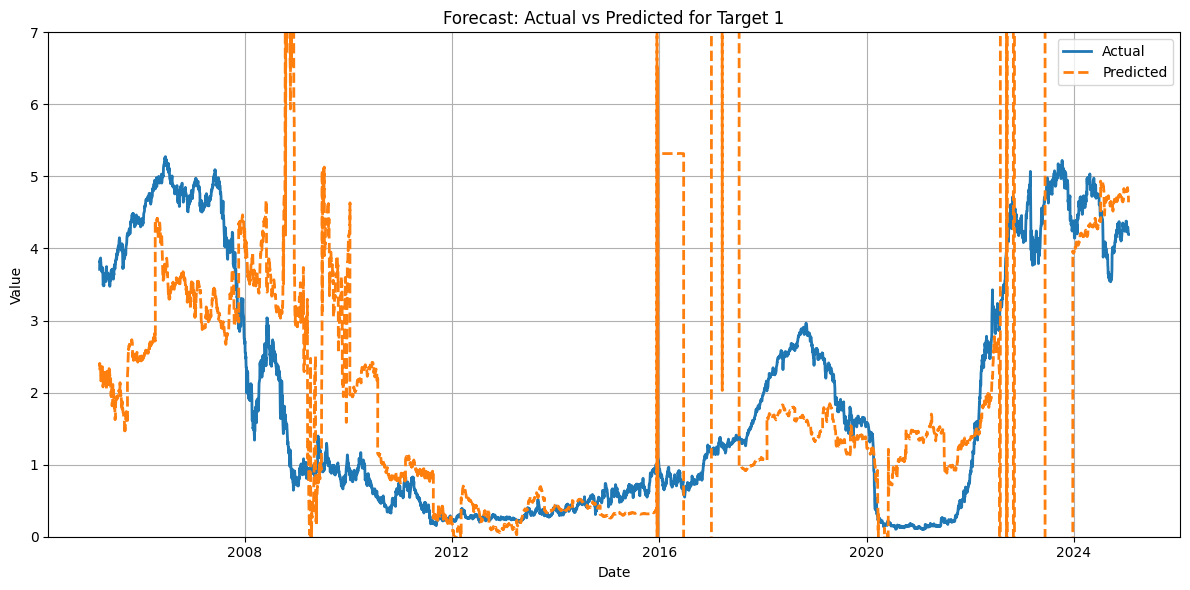

In [232]:
# Convert Date column to datetime
date_index = pd.to_datetime(date_index)

# Pick target index to plot
target_idx = 1

# Create Series with Date as index
y_actual_series = pd.Series(y_actual[:, target_idx], index=date_index, name="Actual")
y_pred_series = pd.Series(y_predict[:, target_idx], index=date_index, name="Predicted")

plt.figure(figsize=(12, 6))
plt.plot(y_actual_series, label="Actual", linewidth=2)
plt.plot(y_pred_series, label="Predicted", linestyle='--', linewidth=2)
plt.title(f"Forecast: Actual vs Predicted for Target {target_idx}")
plt.xlabel("Date")
plt.ylim(0,7)
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [179]:
print(dataset[date].head(10))

          Date
96   5/16/2000
97   5/17/2000
98   5/18/2000
99   5/19/2000
100  5/22/2000
101  5/23/2000
102  5/24/2000
103  5/25/2000
104  5/26/2000
105  5/29/2000


In [221]:
dataset[targets].describe()

,5_day_forecast_USGG3M Index,5_day_forecast_USGG2YR Index,5_day_forecast_USGG10YR Index,5_day_forecast_USGG30YR Index
count,6469.000000,6469.000000,6469.000000,6469.000000
mean,1.785638,2.134129,3.232377,3.824226
std,1.927095,1.703469,1.253502,1.129354
min,-0.137200,0.101300,0.506900,0.995300
25%,0.091300,0.608800,2.189900,2.945900
50%,1.087800,1.656000,3.255200,3.922100
75%,3.156200,3.664800,4.251000,4.730900
max,6.435000,6.832000,6.470000,6.193000
